# Data Science Project SoSe 2024
## Team 07
- Maximilian Hoffmann
- Kilian Kempf
- Daniel Schneider
- Tom Schuck

## Project Submission

### Libraries

In [1]:
import os

import pandas as pd

from feature_engineering import DataManager
from feature_engineering.features import TipHistory, ReorderedRatio, DynamicFeatureTest1, DynamicFeatureTest2, \
    OrderSize, ModeDepartment, PrevTippedProductsRatio, CustomerLifetime, PrevOrderTipped, OrderFrequency, \
    SimOrdersTipRatio, ProductTipRate, DepartmentTipRate, AisleTipRate, OrderExcessLikability, AvgSizePrevOrders, \
    MeanOrderedRate, LastTipSequence, RelDaysSinceTip, DaysSinceTip

### Data Initialization

In [2]:
DATA_DIR = os.path.join(os.getcwd(), 'data/Instacart')

op_prior = pd.read_csv(os.path.join(DATA_DIR, 'order_products__prior.csv.zip'))
op_train = pd.read_csv(os.path.join(DATA_DIR, 'order_products__train.csv.zip'))

tip_train = pd.read_csv(os.path.join(DATA_DIR, 'tip_trainingsdaten1_.csv'))[['order_id', 'tip']]
tip_test = pd.read_csv(os.path.join(DATA_DIR, 'tip_testdaten1_template.csv'))

orders = pd.read_csv(os.path.join(DATA_DIR, 'orders.csv.zip'))
aisles = pd.read_csv(os.path.join(DATA_DIR, 'aisles.csv.zip'))
departments = pd.read_csv(os.path.join(DATA_DIR, 'departments.csv.zip'))
products = pd.read_csv(os.path.join(DATA_DIR, 'products.csv.zip'))

data_manager = DataManager(op_prior, op_train, tip_train, tip_test, orders, products, aisles, departments)
order_amount = len(data_manager.get_orders_tip())

### Feature Engineering

In [3]:
#features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'tip_history',
#          'reordered_ratio', 'order_size', 'mode_dept', 'prev_tipped_products_ratio', 'avg_size_prev_orders']

# Kilian
tip_history = TipHistory()
reordered_rate = ReorderedRatio()
order_size = OrderSize()
prev_tipped_products_ratio = PrevTippedProductsRatio()
customer_lifetime = CustomerLifetime()
prev_order_tipped = PrevOrderTipped()

# Daniel
mode_dept = ModeDepartment()  # TODO: Probably remove (maybe exchange with other order content related feature)
order_frequency = OrderFrequency()
mean_ordered_rate = MeanOrderedRate()  # TODO: First order NaN
rel_days_since_tip = RelDaysSinceTip()  # TODO: NaN handling
days_since_tip = DaysSinceTip()  # TODO: NaN handling

# Max
sim_orders_tip_ratio = SimOrdersTipRatio()
product_tip_rate = ProductTipRate()
department_tip_rate = DepartmentTipRate()
aisle_tip_rate = AisleTipRate()
last_tip_sequence = LastTipSequence()  # TODO: Maybe remove weighting or add additional feature without weoghting

# Tom
order_excess_likability = OrderExcessLikability()  # TODO
avg_size_prev_orders = AvgSizePrevOrders()

# Test
dynamic_feature_test_1 = DynamicFeatureTest1()
dynamic_feature_test_2 = DynamicFeatureTest2()

In [4]:
# Static Features
# data_manager.register_feature(tip_history)
# data_manager.register_feature(reordered_rate)
# data_manager.register_feature(order_size)
# data_manager.register_feature(customer_lifetime)
# data_manager.register_feature(prev_order_tipped)
# data_manager.register_feature(prev_tipped_products_ratio)

# data_manager.register_feature(mode_dept)
# data_manager.register_feature(order_frequency)
# data_manager.register_feature(sim_orders_tip_ratio)
# data_manager.register_feature(order_excess_likability)
data_manager.register_feature(avg_size_prev_orders)
# data_manager.register_feature(mean_ordered_rate)
# data_manager.register_feature(last_tip_sequence)
# data_manager.register_feature(rel_days_since_tip)
# data_manager.register_feature(days_since_tip)

# # Dynamic Features
# data_manager.register_feature(dynamic_feature_test_1)
# data_manager.register_feature(dynamic_feature_test_2)
# data_manager.register_feature(product_tip_rate)
# data_manager.register_feature(department_tip_rate)
# data_manager.register_feature(aisle_tip_rate)

In [5]:
data_manager.compute_features()

In [6]:
data_manager.get_orders_tip().head(100)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip,avg_size_prev_orders
0,2539329,1,prior,1,2,8,NaN,0.0,NaN
1,2398795,1,prior,2,3,7,15.0,0.0,0.200000
2,473747,1,prior,3,3,12,21.0,0.0,-0.090909
3,2254736,1,prior,4,4,7,29.0,0.0,-0.062500
4,431534,1,prior,5,4,15,28.0,0.0,0.523810
...,...,...,...,...,...,...,...,...,...
95,1916106,12,prior,3,5,8,14.0,0.0,0.200000
96,1057378,12,prior,4,3,9,26.0,0.0,0.875000
97,221248,12,prior,5,1,9,30.0,0.0,0.692308
98,2618231,13,prior,1,6,12,NaN,0.0,NaN


In [7]:
# data_manager.export_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [8]:
# data_manager.import_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [9]:
# data_manager.get_orders_tip().head(100)

In [10]:
# test = data_manager.get_orders_tip()

In [11]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

In [12]:
# order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(5)
# order_amount = len(order_ids)

In [13]:
# data_manager.set_subset(order_ids)

In [14]:
# data_manager.get_orders_tip().head(25)

In [15]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

In [16]:
# order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(4)
# order_amount = len(order_ids)
# 
# data_manager.set_subset(order_ids)
# data_manager.get_orders_tip().head(25)

In [17]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

### Analysis
- Only orders from the training set (orders with tip information) are considered

In [18]:
from analysis import DaysSincePriorOrder, DayOfWeek, HourOfDay, Department, OrderNumber, Aisle, Product, NumberOrderUser

In [19]:
day_of_week = DayOfWeek(data_manager)
hour_of_day = HourOfDay(data_manager)
days_since_prior_order = DaysSincePriorOrder(data_manager)
order_number = OrderNumber(data_manager)
department = Department(data_manager)
aisle = Aisle(data_manager)
product = Product(data_manager)
number_order_user = NumberOrderUser(data_manager)

# Frequency of items with tip probability > 0.9, 0.8, 0.7, 0.6, 0.5 ... 0.1 
# Group into percentiles and average tip probability
# Plot bar chart with tip probability and mean tip probability (limit to top 10?)

# TODO:
# - Decide on departments grouping
# - Product/Department/Aisle Tip Rate

In [20]:
# day_of_week.execute_analysis()

In [21]:
# hour_of_day.execute_analysis()

In [22]:
# days_since_prior_order.execute_analysis()

In [23]:
# order_number.execute_analysis()

In [24]:
# department.execute_analysis()

In [25]:
# aisle.execute_analysis()

In [26]:
# product.execute_analysis()

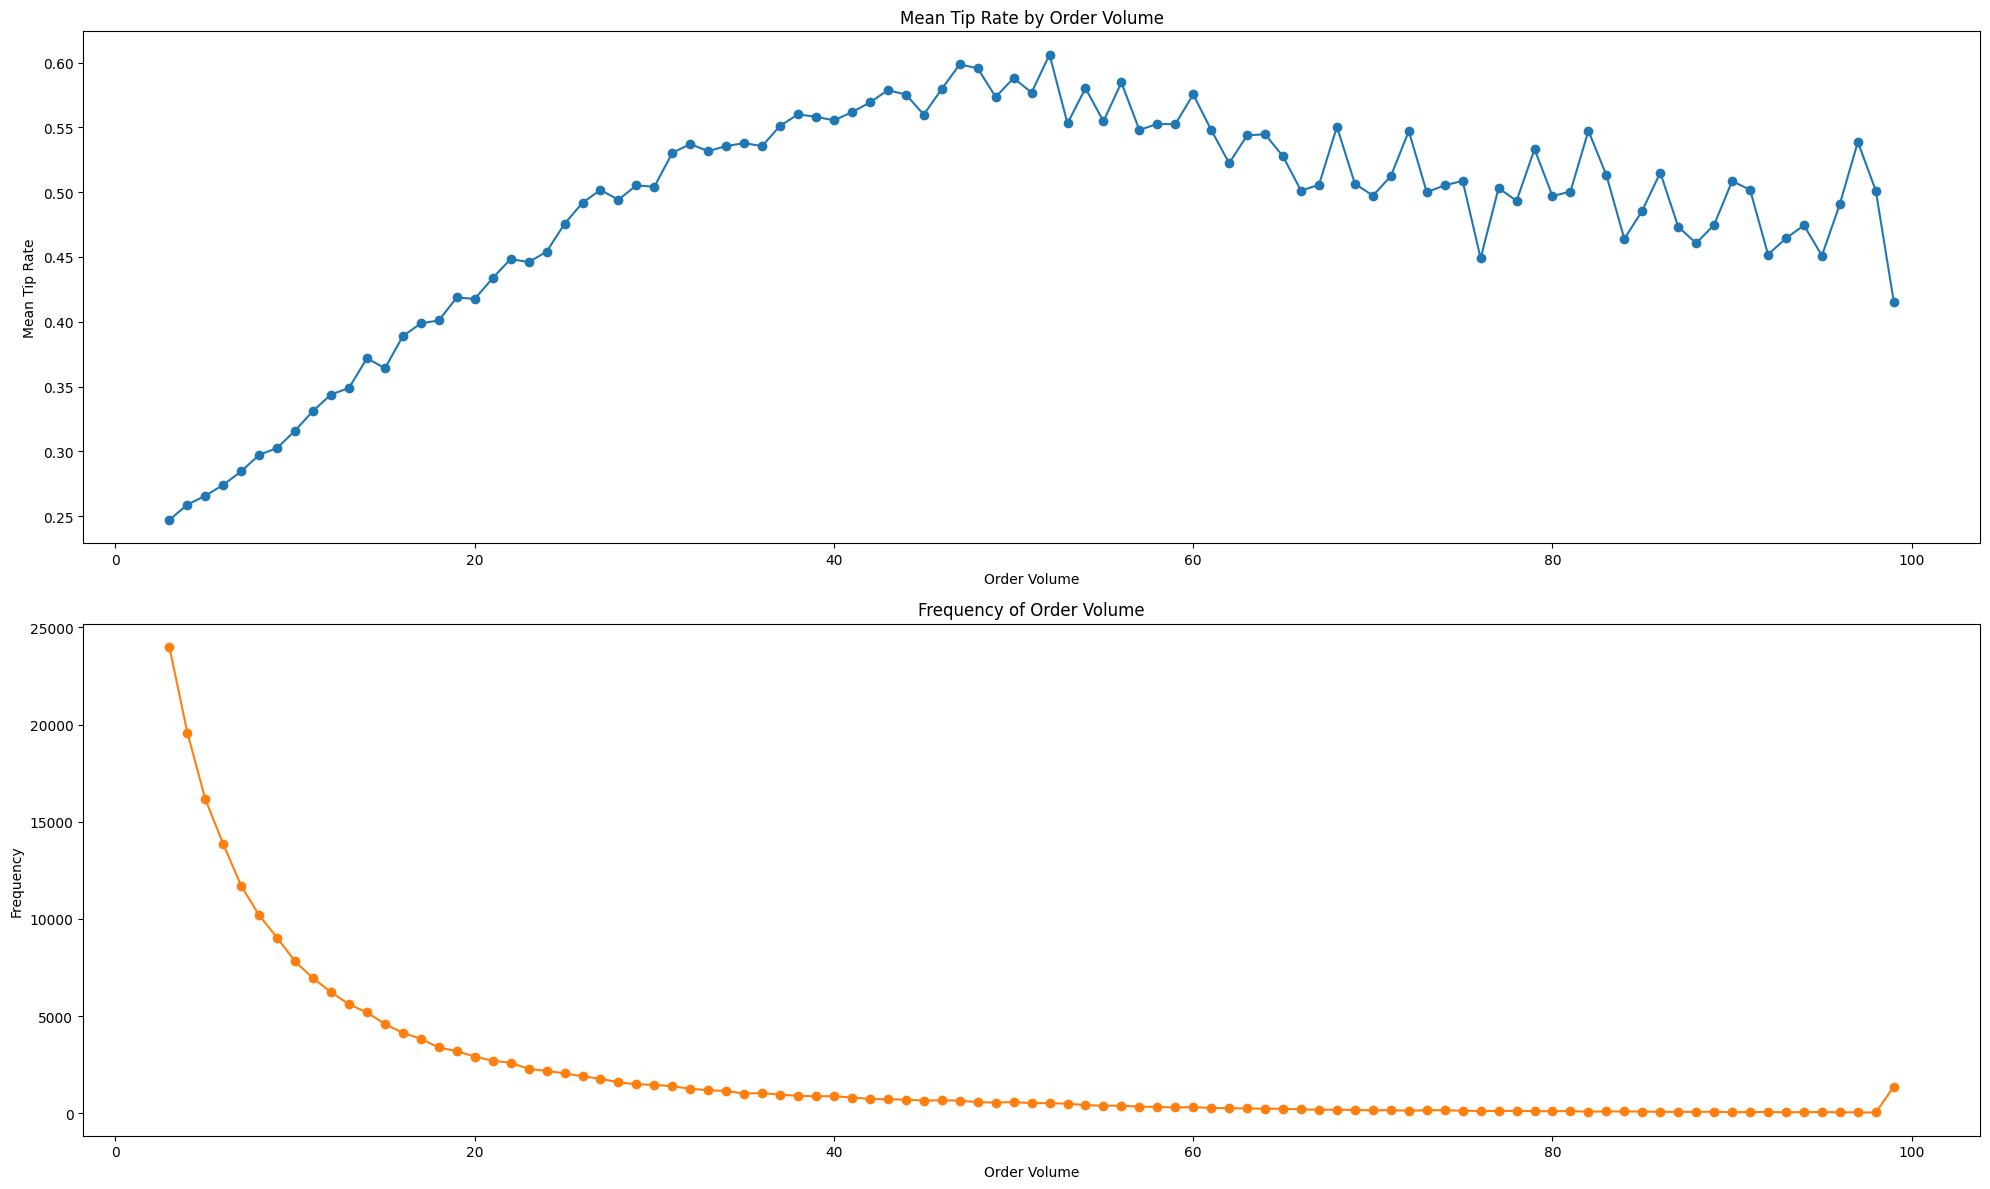

In [27]:
# number_order_user.execute_analysis()

In [80]:
# a = days_since_prior_order
# product_department_tip = a.orders_joined[['product_id', 'department_id', 'tip']]
# product_department_tip

In [81]:
# product_mapping = a.products.set_index('product_id')['product_name']
# 
# # alcohol_department_id = a.departments[a.departments['department'] == 'alcohol']['department_id'].values[0]
# # alcohol_product_ids = product_department_tip[product_department_tip['department_id'] == alcohol_department_id][
# #     'product_id'].unique()
# # a.alcohol_products = product_mapping.loc[alcohol_product_ids].values
# 
# cross_tab_product_normalized = (pd.crosstab(index=product_department_tip['product_id'],
#                                             columns=product_department_tip['tip'],
#                                             margins=True,
#                                             normalize='index')
#                                 # .rename(index=product_mapping)
#                                 .sort_values(by=1, ascending=False))
# cross_tab_product_normalized

In [82]:
# cross_tab_product = (pd.crosstab(index=product_department_tip['product_id'],
#                                  columns=product_department_tip['tip'],
#                                  margins=True)
#                      .sort_values(by=1, ascending=False))
# cross_tab_product

In [83]:
# mean_product_frequency = cross_tab_product['All'].mean()
# mean_product_frequency

In [84]:
# median_product_frequency = cross_tab_product['All'].median()
# median_product_frequency

In [85]:
# mean_tip_probability = cross_tab_product_normalized[1]['All']

In [86]:
# cross_tab_product_normalized = cross_tab_product_normalized.drop('All', axis=0)
# cross_tab_product = cross_tab_product.drop('All', axis=0)

In [87]:
# product_probability_freq = pd.merge(cross_tab_product_normalized, cross_tab_product['All'], left_index=True,
#                                     right_index=True)
# product_probability_freq = pd.merge(product_probability_freq, products, left_index=True, right_on='product_id')
# product_probability_freq.sort_values(by=[1, 'All'], ascending=False)

In [88]:
# orders_tip_probability_1 = cross_tab_product_normalized[cross_tab_product_normalized[1] == 1].index
# len(orders_tip_probability_1)

In [89]:
# orders_tip_probability_1_freq = cross_tab_product[cross_tab_product.index.isin(orders_tip_probability_1)]['All']
# orders_tip_probability_1_freq = pd.merge(orders_tip_probability_1_freq, products, left_index=True,
#                                          right_on='product_id')
# orders_tip_probability_1_freq

In [90]:
# orders_tip_probability_0 = cross_tab_product_normalized[cross_tab_product_normalized[1] == 0].index
# len(orders_tip_probability_0)

In [91]:
# orders_tip_probability_0_freq = cross_tab_product[cross_tab_product.index.isin(orders_tip_probability_0)]['All']
# orders_tip_probability_0_freq = pd.merge(orders_tip_probability_0_freq, products, left_index=True,
#                                          right_on='product_id')
# orders_tip_probability_0_freq

In [92]:
# import matplotlib.pyplot as plt
# 
# # Plot line graph of cross tab normalized of product tip probabilities
# fig, ax = plt.subplots(1, 1, figsize=(20, 12))
# 
# # Plot the line graph of the tip probabilities
# cross_tab_product_normalized[1].plot(ax=ax, kind='line', legend=False)
# 
# # Display the plots
# plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure
# plt.show()

In [93]:
# import matplotlib.pyplot as plt
# 
# fig, ax = plt.subplots(1, 1, figsize=(20, 6))
# 
# # Plot the density of tip probabilities for all products
# ax.hist(product_probability_freq[1], bins=100, edgecolor='white')
# ax.axvline(mean_tip_probability, color='red', linestyle='dotted')
# 
# # Display the plot
# plt.tight_layout()
# plt.show()

In [94]:
# # Plot the histogram of tip probabilities for all products, but this time multiplied by the frequency of each product
# fig, ax = plt.subplots(1, 1, figsize=(20, 6))
# 
# # Plot the density of tip probabilities for all products
# ax.hist(product_probability_freq[1], bins=100,
#         weights=product_probability_freq['All'], edgecolor='white')
# ax.axvline(mean_tip_probability, color='red', linestyle='dotted', label='Mean tip probability')
# 
# # Show legend
# ax.legend()
# 
# # Display the plot
# plt.tight_layout()
# plt.show()

In [95]:
# # Plot 2 histograms, one for products with tip probability >= 0.75 and one for products with tip probability <= 0.25
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# 
# # Plot the histogram of tip probabilities for products with tip probability <= 0.25
# ax1.hist(product_probability_freq[product_probability_freq[1] <= 0.20][1], bins=20, edgecolor='white')
# 
# # Plot the histogram of tip probabilities for products with tip probability >= 0.75
# ax2.hist(product_probability_freq[product_probability_freq[1] >= 0.80][1], bins=20, edgecolor='white')
# 
# plt.tight_layout()
# plt.show()

In [96]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# 
# # Filter the data
# data1_dept5 = \
#     product_probability_freq[(product_probability_freq[1] <= 0.20) & (product_probability_freq['department_id'] == 5)][
#         1]
# data1_other = \
#     product_probability_freq[(product_probability_freq[1] <= 0.20) & (product_probability_freq['department_id'] != 5)][
#         1]
# 
# data2_dept5 = \
#     product_probability_freq[(product_probability_freq[1] >= 0.80) & (product_probability_freq['department_id'] == 5)][
#         1]
# data2_other = \
#     product_probability_freq[(product_probability_freq[1] >= 0.80) & (product_probability_freq['department_id'] != 5)][
#         1]
# 
# # Plot the histograms
# ax1.hist([data1_other, data1_dept5], bins=20, stacked=True, edgecolor='white', color=['C0', 'C1'])
# ax2.hist([data2_other, data2_dept5], bins=20, stacked=True, edgecolor='white', color=['C0', 'C1'])
# 
# plt.tight_layout()
# plt.show()

In [97]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# 
# # Get unique department_ids
# department_ids = product_probability_freq['department_id'].unique()
# 
# # Define a color map (you can adjust this to your liking)
# color_map = plt.get_cmap('hsv', len(department_ids))
# 
# for i, department_id in enumerate(department_ids):
#     # Filter the data for each department_id
#     data1 = product_probability_freq[
#         (product_probability_freq[1] <= 0.20) & (product_probability_freq['department_id'] == department_id)][1]
#     data2 = product_probability_freq[
#         (product_probability_freq[1] >= 0.80) & (product_probability_freq['department_id'] == department_id)][1]
# 
#     # Plot the histograms
#     ax1.hist(data1, bins=20, stacked=True, edgecolor='white', color=color_map(i), label=f'Department {department_id}')
#     ax2.hist(data2, bins=20, stacked=True, edgecolor='white', color=color_map(i), label=f'Department {department_id}')
# 
# # Add legends
# ax1.legend()
# ax2.legend()
# 
# plt.tight_layout()
# plt.show()

In [98]:
# # Plot the histogram of tip probabilities for products with tip probability >= 0.75 and <= 0.25, but this time multiplied by the frequency of each product
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# 
# # Plot the histogram of tip probabilities for products with tip probability <= 0.25
# ax1.hist(product_probability_freq[product_probability_freq[1] <= 0.20][1], bins=20,
#          weights=product_probability_freq[product_probability_freq[1] <= 0.20]['All'], edgecolor='white')
# 
# # Plot the histogram of tip probabilities for products with tip probability >= 0.75
# ax2.hist(product_probability_freq[product_probability_freq[1] >= 0.80][1], bins=20,
#          weights=product_probability_freq[product_probability_freq[1] >= 0.80]['All'], edgecolor='white')
# 
# plt.tight_layout()
# plt.show()

In [99]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# 
# # Filter the data
# data1_dept5 = \
#     product_probability_freq[(product_probability_freq[1] <= 0.20) & (product_probability_freq['department_id'] == 5)]
# data1_other = \
#     product_probability_freq[(product_probability_freq[1] <= 0.20) & (product_probability_freq['department_id'] != 5)]
# 
# data2_dept5 = \
#     product_probability_freq[(product_probability_freq[1] >= 0.80) & (product_probability_freq['department_id'] == 5)]
# data2_other = \
#     product_probability_freq[(product_probability_freq[1] >= 0.80) & (product_probability_freq['department_id'] != 5)]
# 
# # Plot the histograms
# ax1.hist([data1_other[1], data1_dept5[1]], bins=20, stacked=True, edgecolor='white', color=['C0', 'C1'],
#          weights=[data1_other['All'], data1_dept5['All']])
# ax2.hist([data2_other[1], data2_dept5[1]], bins=20, stacked=True, edgecolor='white', color=['C0', 'C1'],
#          weights=[data2_other['All'], data2_dept5['All']])
# 
# plt.tight_layout()
# plt.show()

In [100]:
# fig, ax = plt.subplots(1, 1, figsize=(20, 6))
# no_tip_products = product_probability_freq[product_probability_freq[1] == 0.0][['All', 'product_id']].groupby(
#     'All').count()
# 
# ax.bar(no_tip_products.index, no_tip_products['product_id'], edgecolor='white')
# ax.set_xticks(no_tip_products.index)
# 
# plt.tight_layout()
# plt.show()

In [101]:
# product_probability_freq

### Data Preparation

In [102]:
from feature_engineering.features import DowHighTipProbability, HodHighTipProbability, OrderNumberSquared, \
    ContainsAlcohol

data_manager.register_feature(DowHighTipProbability())
data_manager.register_feature(HodHighTipProbability())
data_manager.register_feature(OrderNumberSquared())
data_manager.register_feature(ContainsAlcohol())

In [103]:
data_manager.compute_features()

In [104]:
# orders_with_alcohol = data_manager.get_orders_tip()[data_manager.get_orders_tip()['contains_alcohol'] == 1][
#     ['order_id', 'contains_alcohol']]
# test = pd.merge(orders_with_alcohol, data_manager.get_orders_joined(),
#                 on='order_id')[['order_id', 'contains_alcohol', 'department_id', 'product_id']]

In [105]:
# len(orders_with_alcohol)

In [106]:
# len(data_manager.get_orders_joined()[data_manager.get_orders_joined()['department_id'] == 5]['order_id'].unique())

### Model Training & Evaluation